In [137]:
!pip install pillow
!pip install pands
!pip install tkinter
!pip install tqdm
!pip install qrcode

ERROR: Could not find a version that satisfies the requirement pands (from versions: none)
ERROR: No matching distribution found for pands
ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter
ERROR: unknown command "instal" - maybe you meant "install"


In [ ]:
#

In [1]:
import pandas as pd

In [5]:
import PIL

In [15]:
import qrcode

In [19]:
from tqdm import tqdm

In [22]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [23]:
import tkinter.font as TkFont

In [20]:
data = pd.read_csv("poster_list.csv",delimiter=";")

In [32]:
!cp -r ../images/azonix .

In [33]:
S = 30
FONT = "azonix/Azonix.otf"
font = ImageFont.truetype(FONT, S)

In [21]:
data.head()

,Link,Number,Name,Date,Time
0,https://indico.cern.ch/event/1106990/contribut...,12,A comparison of HEPSPEC benchmark performance ...,24/10/2022,11:00
1,https://indico.cern.ch/event/1106990/contribut...,32,A FPGA Implementation of the Hough Transform t...,24/10/2022,11:00
2,https://indico.cern.ch/event/1106990/contribut...,17,AI Data Quality Monitoring with Hydra,24/10/2022,11:00
3,https://indico.cern.ch/event/1106990/contribut...,9,Applications of supercomputer Tianhe-II in BESIII,24/10/2022,11:00
4,https://indico.cern.ch/event/1106990/contribut...,18,AtlFast3: Fast Simulation in ATLAS for Run 3 a...,24/10/2022,11:00


In [127]:
!mkdir qrs

In [134]:
max_w = 450
imagelist = []
W = 2480
H = 3508
FONT = "liberation_serif/LiberationSerif-Regular.ttf"
FONT_BOLD = "liberation_serif/LiberationSerif-Bold.ttf"
FONT = "azonix/Azonix.otf"
FONT_BOLD = "azonix/Azonix.otf"
for i,f in tqdm(data.iterrows()):
   
    a4im = Image.new('RGB',
                 (W, H),   # A4 at 72dpi
                 (255, 255, 255)) 
    
    qr = qrcode.make(f["Link"],box_size=40)
    
   
    
    a4im.paste(qr,(int(W/2-qr.getbbox()[2]/2),int(5*H/8-qr.getbbox()[3]/2)))

    draw = ImageDraw.Draw(a4im)
    
    P = H/8
    
    font = ImageFont.truetype(FONT, 140)
    draw.text((W/2,P), "ACAT 2022", fill=(0, 0, 0),font=font,anchor="mm")
    
    P = P + H/18
    font = ImageFont.truetype(FONT, 80)
    draw.text((W/2,P), "#"+str(f["Number"]), fill=(0, 0, 0),font=font,anchor="mm")
    
    font = ImageFont.truetype(FONT, 70)
    split = f["Name"].split(" ")
    P = P + H/12
    if len(split)>6:
        chunk1 = split[:int(len(split)/3)]
        chunk2 = split[int(len(split)/3):int(2*len(split)/3)]
        chunk3 = split[int(len(split)*2/3):]
        draw.text((W/2,P), " ".join(chunk1), fill=(0, 0, 0),font=font,anchor="mm")
        P = P + H/36
        draw.text((W/2,P), " ".join(chunk2), fill=(0, 0, 0),font=font,anchor="mm")
        P = P + H/36
        draw.text((W/2,P), " ".join(chunk3), fill=(0, 0, 0),font=font,anchor="mm")
    else:
        P = P + 2*H/36
        draw.text((W/2,P), str(f["Name"]), fill=(0, 0, 0),font=font,anchor="mm")
    P = P + 2*H/36
    draw.text((W/2,7/8*H), str(f["Date"]) + " - " +str(f["Time"]), fill=(0, 0, 0),font=font,anchor="mm")
    a4im.save("qrs/%d_qr.pdf"%f["Number"])
    

128it [00:27,  4.59it/s]


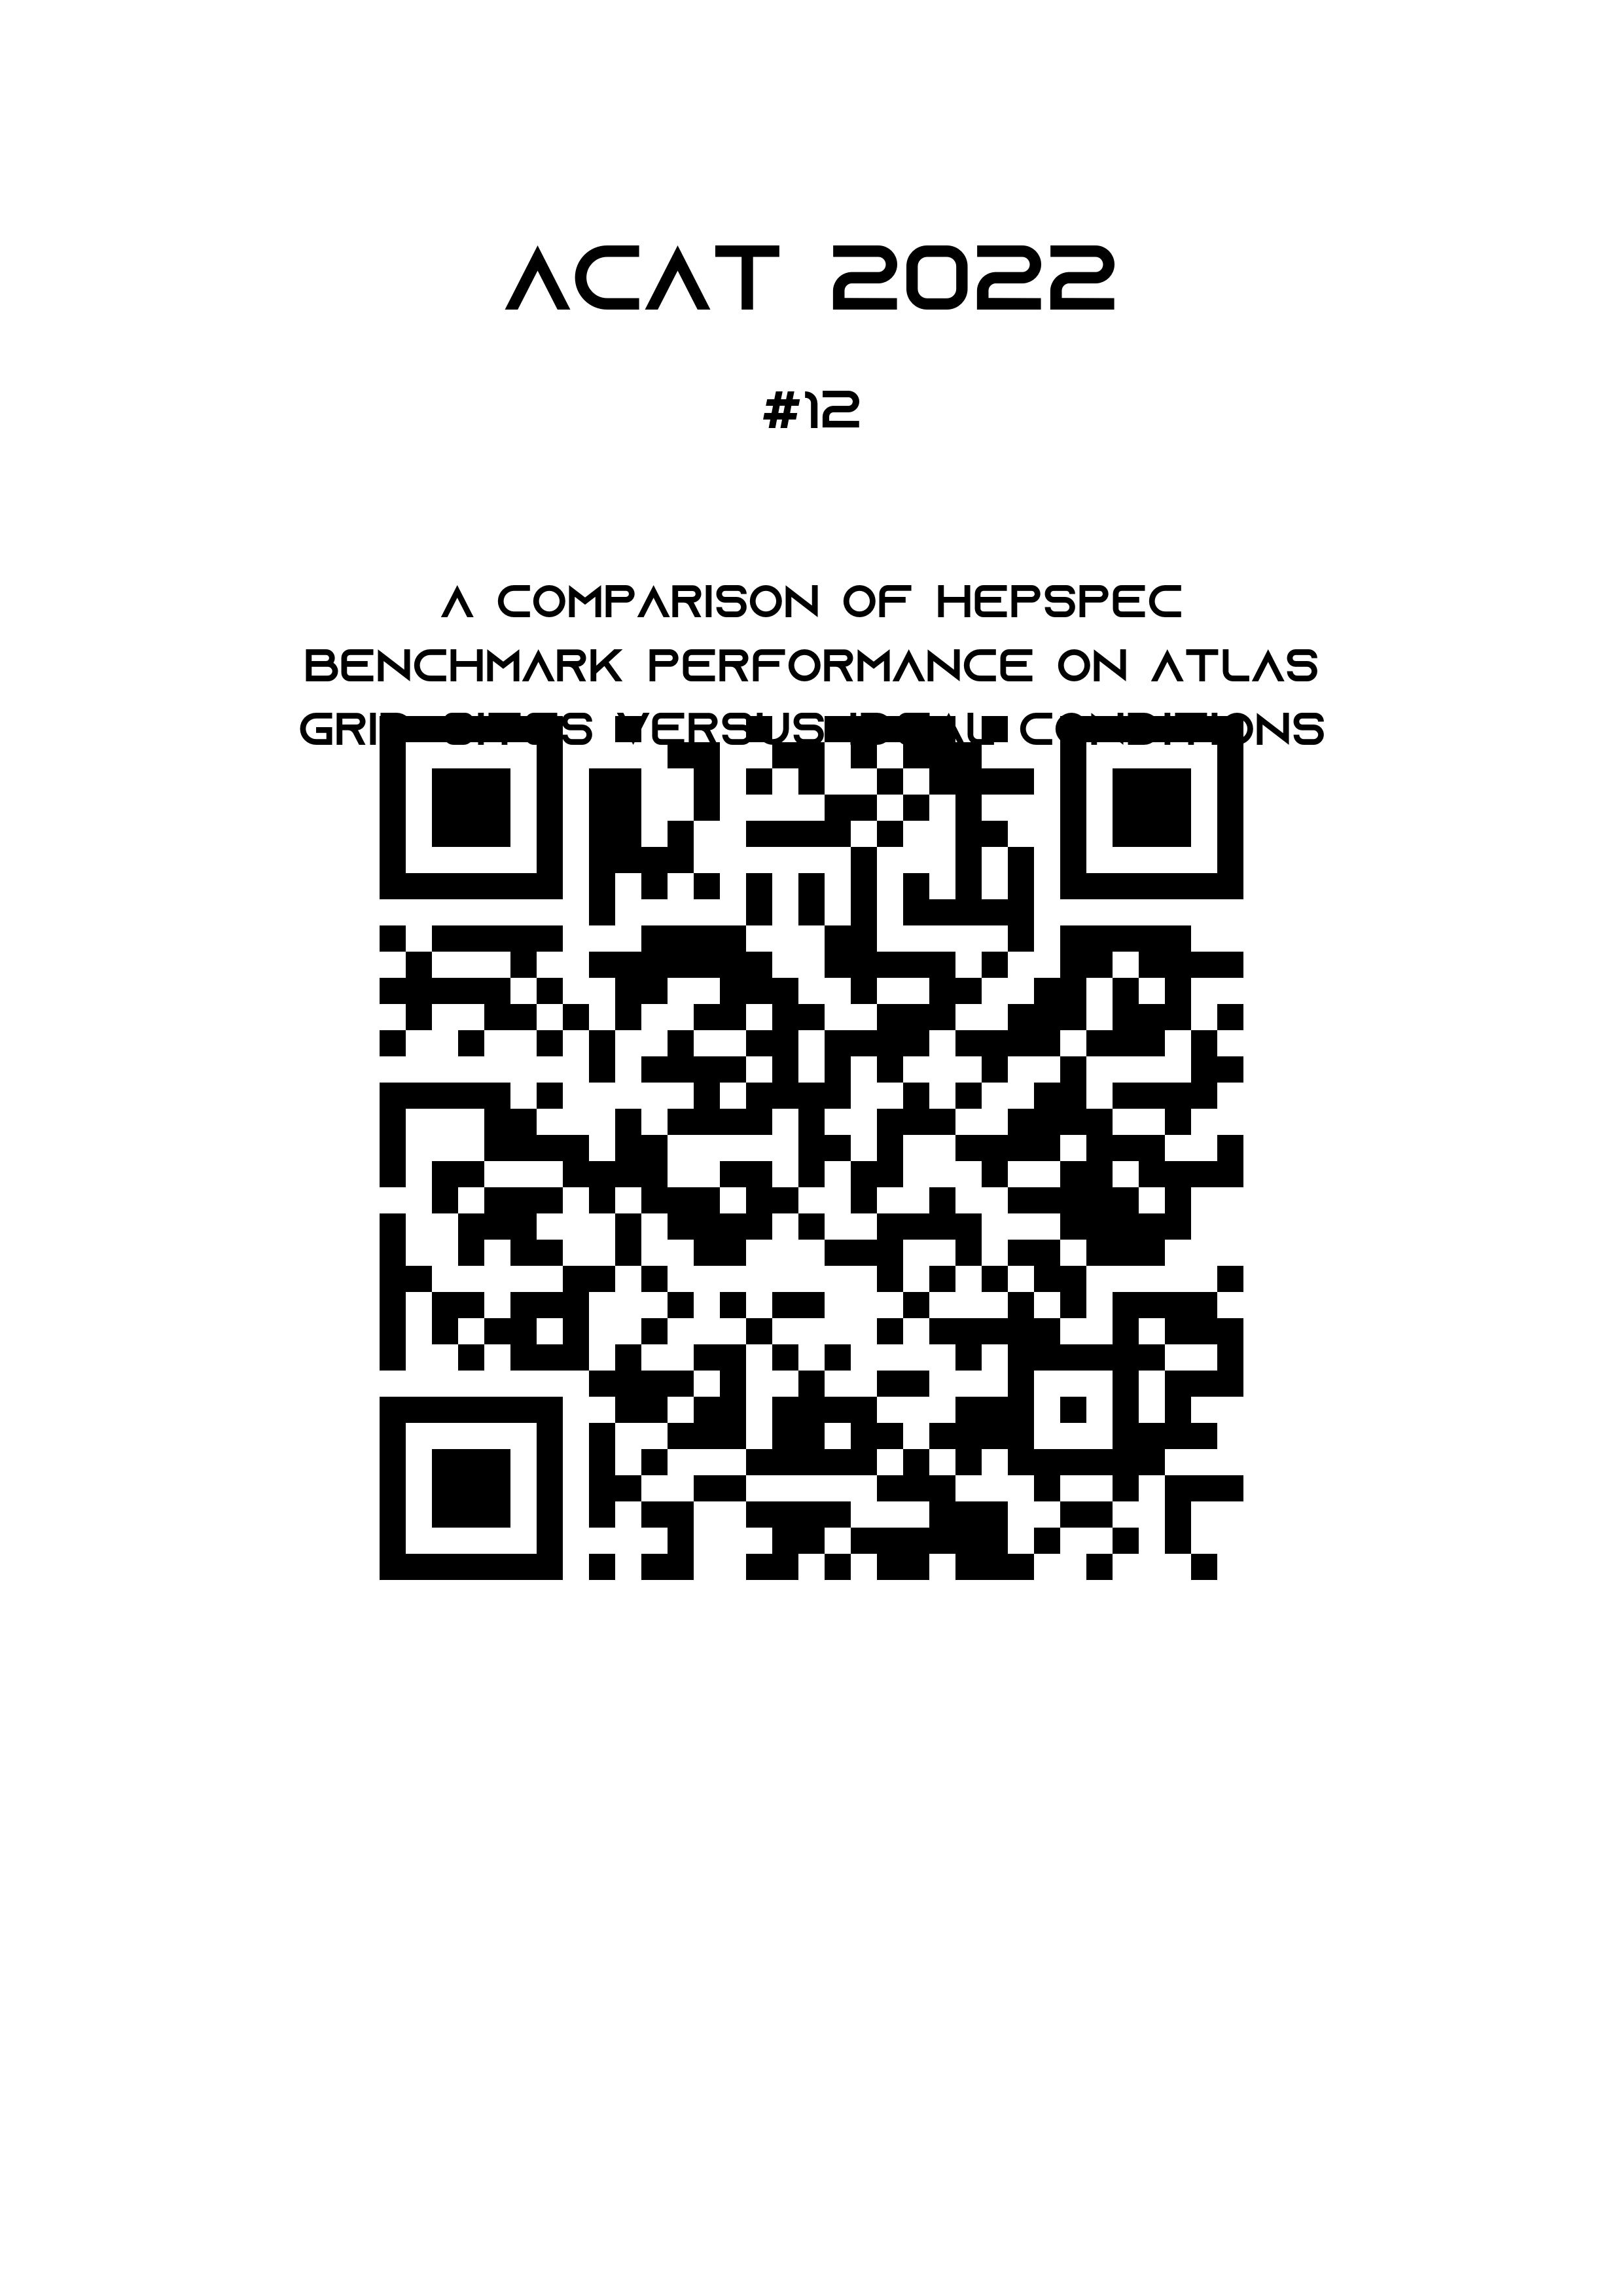

In [122]:
display(a4im)

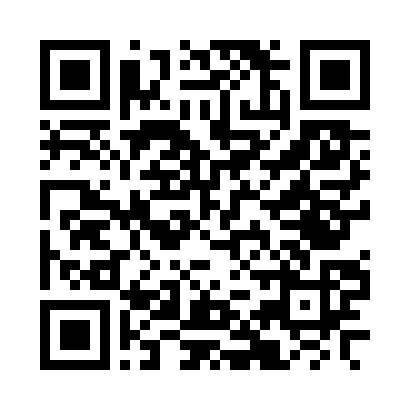

In [17]:

C = 0
im = 0
for n,i in enumerate(imagelist):
    N = n + 1
    print(n%10)
    if n%8==0 and n>0:
        a4im.save("test%d.pdf"%C, 'PDF', quality=100)
        C = C + 1
        im = 0
        a4im = Image.new('RGB',
                 (2480, 3508),   # A4 at 72dpi
                 (255, 255, 255)) 

    a4im.paste(i,(gap+(dx+gap)*int(im%2),(dy+gap)*int(im/2)+gap))
    im = im + 1